### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

</br></br>**Code Tutorial:** https://towardsdatascience.com/a-guide-to-data-visualisation-in-r-for-beginners-ef6d41a34174</br></br>

In [1]:
# Load in sample data set
data(airquality)

In [2]:
# Check Type of Data
typeof(airquality)

[1] "list"

In [3]:
# Display structure of object
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [4]:
# Display the top 5 Rows
head(airquality, 5)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5


In [5]:
# Generate Statistical Summary of Data
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

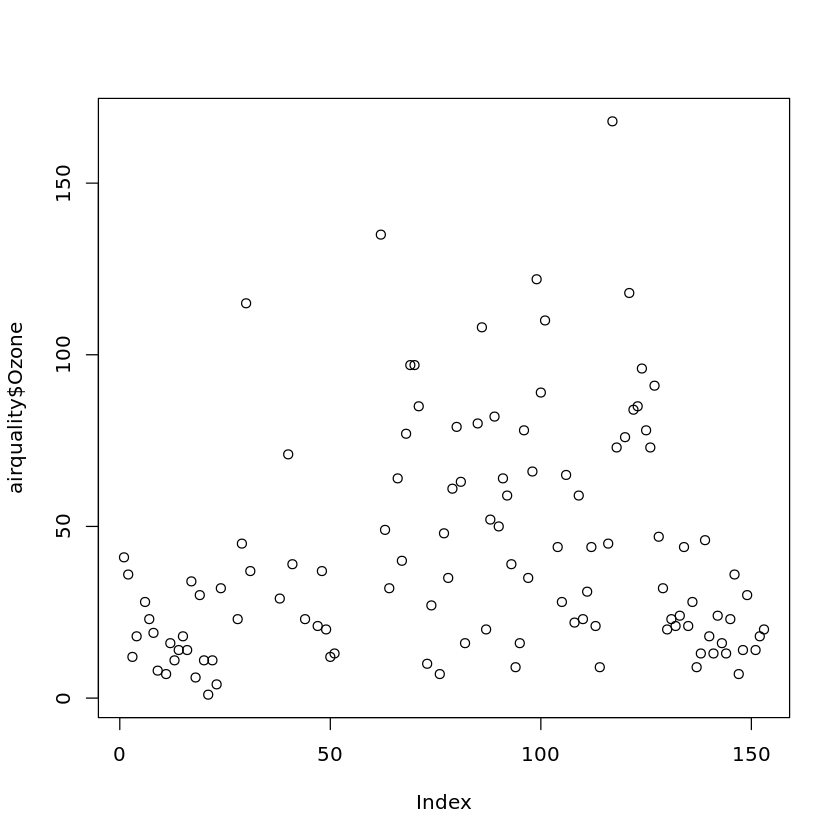

In [6]:
# Use the plot() function to visualise
plot(airquality$Ozone)

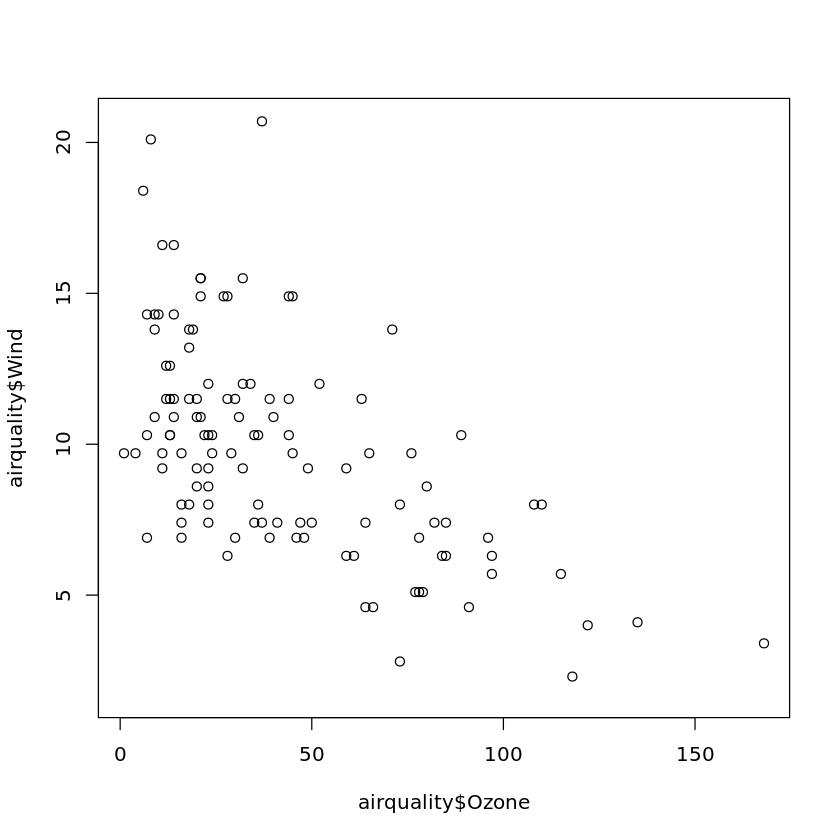

In [7]:
# Lets now plot a graph between the Ozone and Wind Values
plot(airquality$Ozone, airquality$Wind)

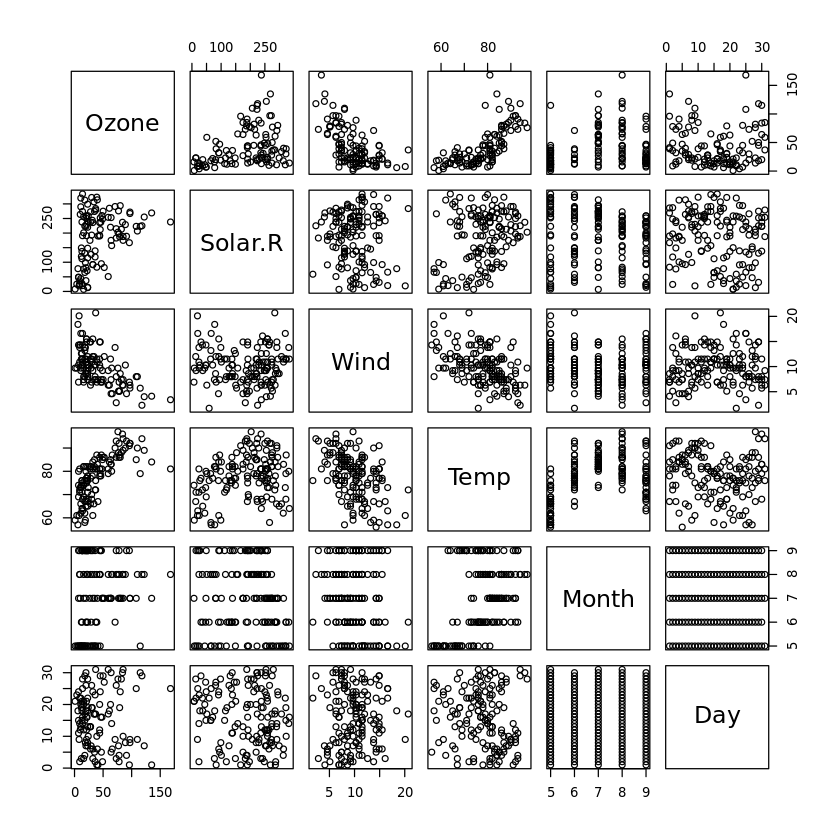

In [8]:
# We can also plot the relationship between all column values
plot(airquality)

In [ ]:
# We can add arguments to plot lines (l), points(p) or both (b)
 plot(airquality$Ozone, type= "b")

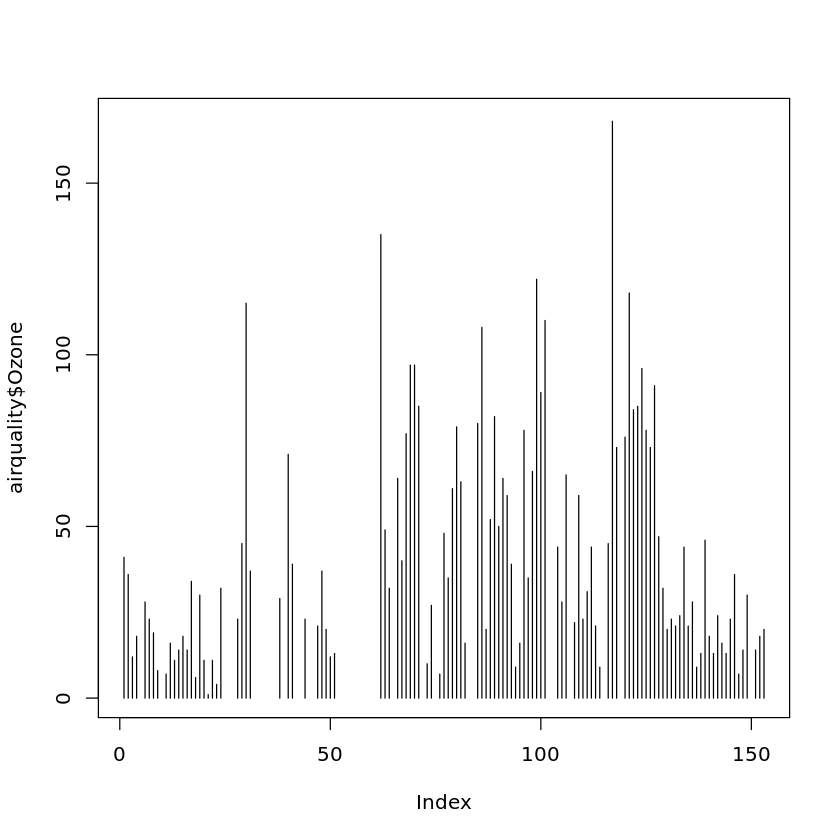

In [9]:
# high density vertical lines.
 plot(airquality$Ozone, type= "h")

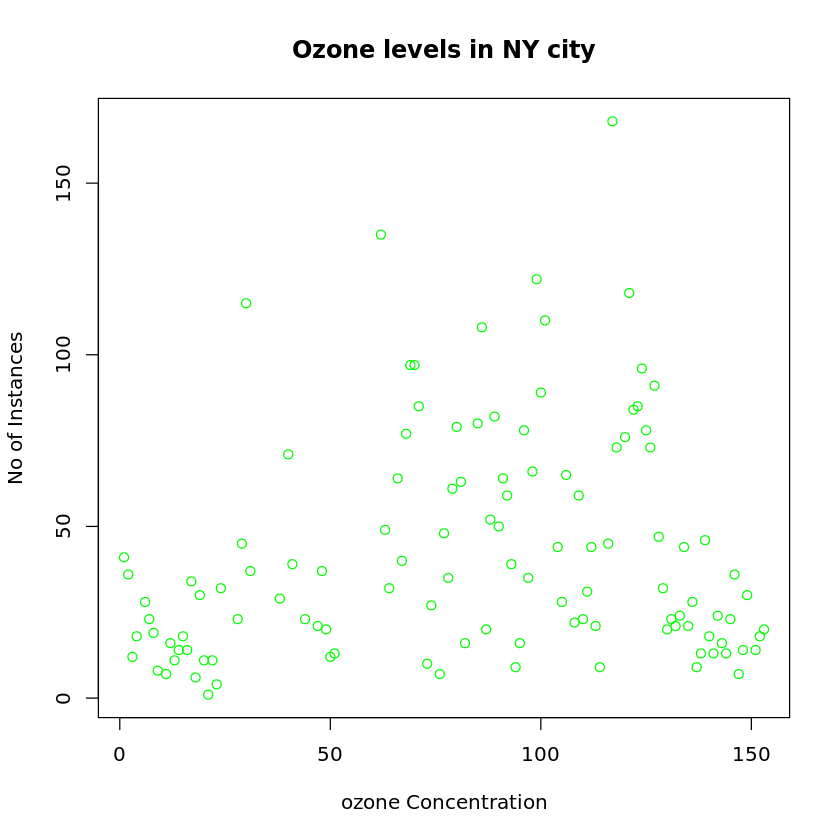

In [10]:
# We can also label the X and the Y axis and give a title to our plot. 
# Additionally, we also have the option of giving color to the plot.
plot(airquality$Ozone, 
     xlab = 'ozone Concentration', 
     ylab = 'No of Instances', 
     main = 'Ozone levels in NY city', 
     col = 'green')

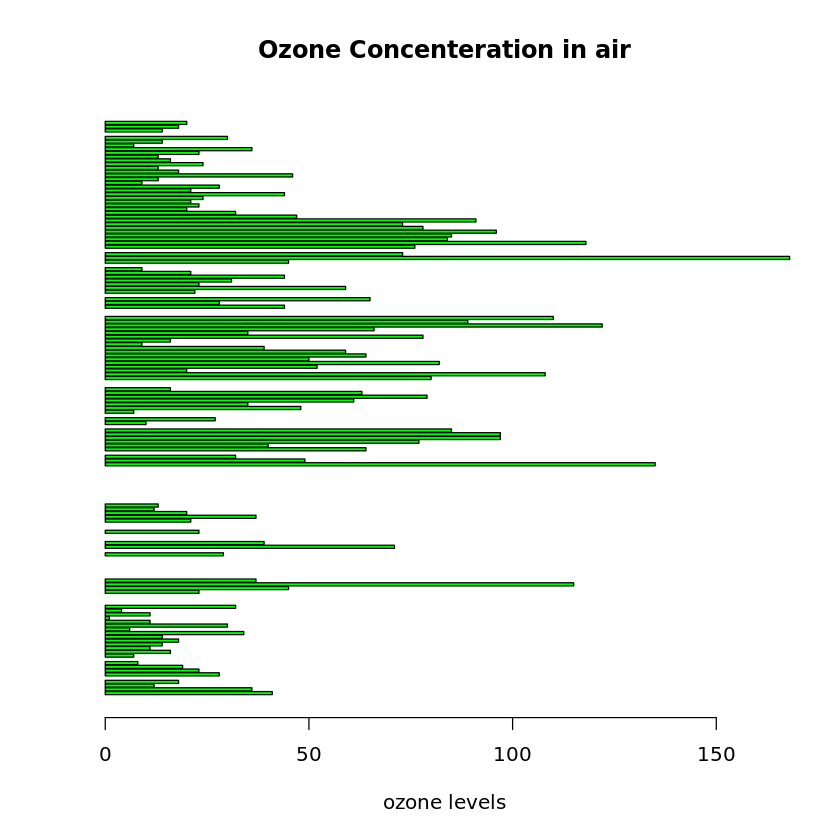

In [11]:
# We can plot bar charts
barplot(airquality$Ozone, 
        main = 'Ozone Concenteration in air',
        xlab = 'ozone levels', 
        col= 'green',
        horiz = TRUE)

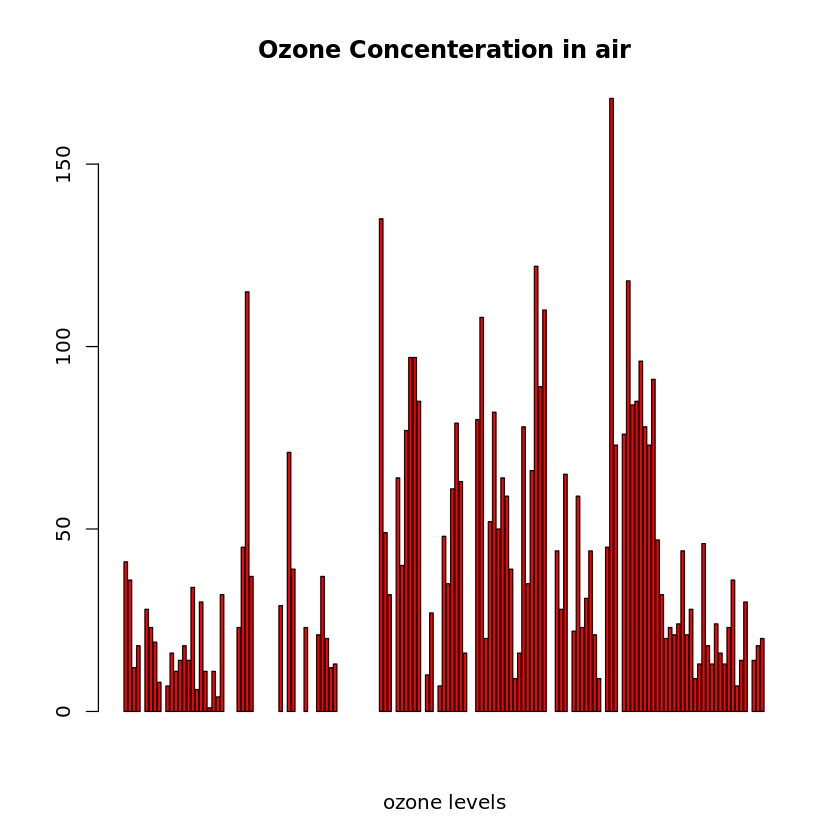

In [12]:
# Vertical bar plot
barplot(airquality$Ozone, 
        main = 'Ozone Concenteration in air',
        xlab = 'ozone levels', 
        col='red',
        horiz = FALSE)

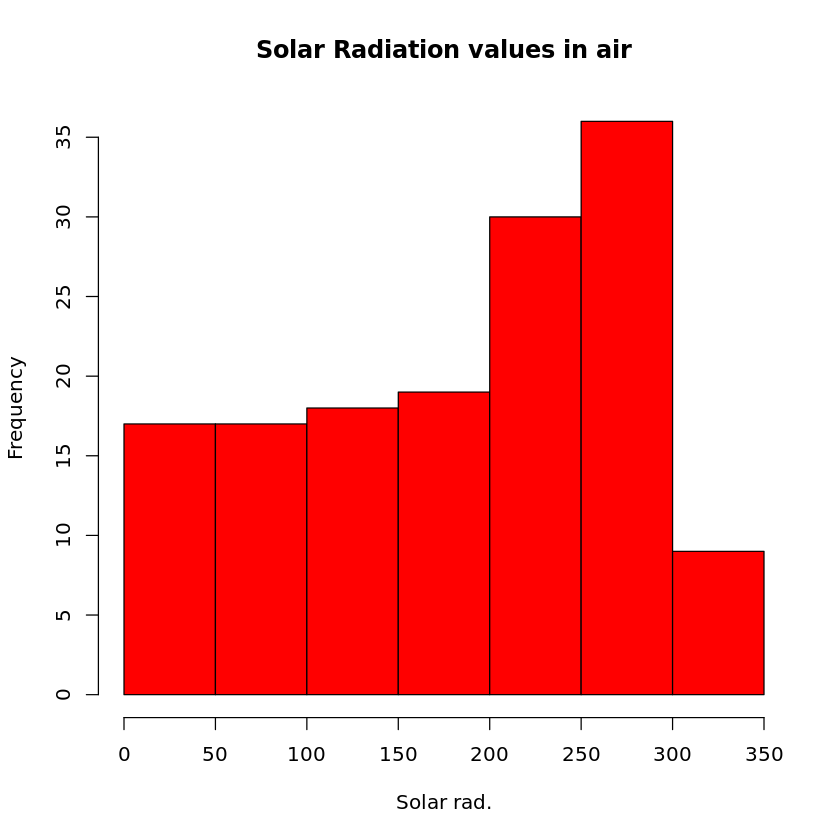

In [13]:
# We can create histograms
hist(airquality$Solar.R, 
     main = 'Solar Radiation values in air',
     xlab = 'Solar rad.', 
     col='red')

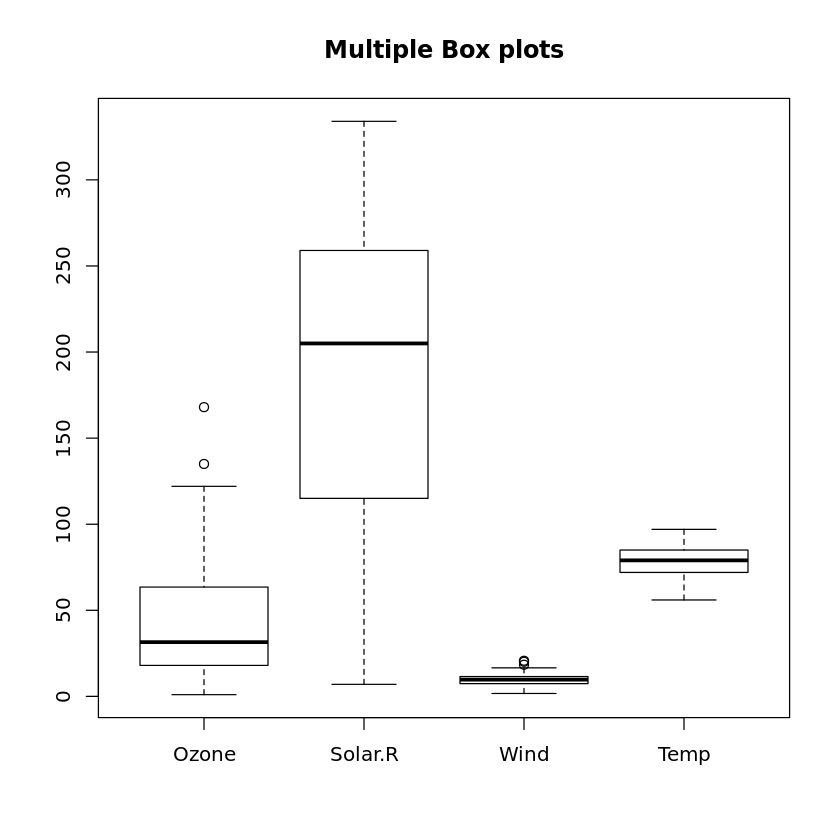

In [14]:
# We can create multiple box plots
boxplot(airquality[,0:4], main='Multiple Box plots')